# AI-deteciton using features from separate RGB channels

### Import libraries and set random state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

random_state = 123

### Import extracted features

In [2]:
df = pd.read_csv("/kaggle/input/cifake-rgb-radiomic-features/RGB_train_features.csv", index_col=0)
test_data = pd.read_csv("/kaggle/input/cifake-rgb-radiomic-features/RGB_test_features.csv", index_col=0)
df.head()

,Image,Mask,Category,R_diagnostics_Versions_PyRadiomics,R_diagnostics_Versions_Numpy,R_diagnostics_Versions_SimpleITK,R_diagnostics_Versions_PyWavelet,R_diagnostics_Versions_Python,R_diagnostics_Configuration_Settings,R_diagnostics_Configuration_EnabledImageTypes,...,B_lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,B_lbp-2D_gldm_LowGrayLevelEmphasis,B_lbp-2D_gldm_SmallDependenceEmphasis,B_lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,B_lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,B_lbp-2D_ngtdm_Busyness,B_lbp-2D_ngtdm_Coarseness,B_lbp-2D_ngtdm_Complexity,B_lbp-2D_ngtdm_Contrast,B_lbp-2D_ngtdm_Strength
0,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
1,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
2,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
3,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
4,D:\studia_zadania\Others\AIImageDetection\data...,D:\studia_zadania\Others\AIImageDetection\data...,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0


### Preprocess imported data (remove identicall features, divide into train, valifation, test, etc.)

In [3]:
# Drop columns with only one value
for column in df.columns:
    if df[column].min() == df[column].max():
        print(column)
        df.drop(column, axis=1, inplace=True)
        test_data.drop(column, axis=1, inplace=True)
        
df.head()

Mask
R_diagnostics_Versions_PyRadiomics
R_diagnostics_Versions_Numpy
R_diagnostics_Versions_SimpleITK
R_diagnostics_Versions_PyWavelet
R_diagnostics_Versions_Python
R_diagnostics_Configuration_Settings
R_diagnostics_Configuration_EnabledImageTypes
R_diagnostics_Image-original_Dimensionality
R_diagnostics_Image-original_Spacing
R_diagnostics_Image-original_Size
R_diagnostics_Mask-original_Hash
R_diagnostics_Mask-original_Spacing
R_diagnostics_Mask-original_Size
R_diagnostics_Mask-original_BoundingBox
R_diagnostics_Mask-original_VoxelNum
R_diagnostics_Mask-original_VolumeNum
R_diagnostics_Mask-original_CenterOfMassIndex
R_diagnostics_Mask-original_CenterOfMass
R_original_shape2D_Elongation
R_original_shape2D_MajorAxisLength
R_original_shape2D_MaximumDiameter
R_original_shape2D_MeshSurface
R_original_shape2D_MinorAxisLength
R_original_shape2D_Perimeter
R_original_shape2D_PerimeterSurfaceRatio
R_original_shape2D_PixelSurface
R_original_shape2D_Sphericity
R_lbp-2D_firstorder_Entropy
R_lbp-2

,Image,Category,R_diagnostics_Image-original_Hash,R_diagnostics_Image-original_Mean,R_diagnostics_Image-original_Minimum,R_diagnostics_Image-original_Maximum,R_original_firstorder_10Percentile,R_original_firstorder_90Percentile,R_original_firstorder_Energy,R_original_firstorder_Entropy,...,B_lbp-2D_firstorder_InterquartileRange,B_lbp-2D_firstorder_Kurtosis,B_lbp-2D_firstorder_MeanAbsoluteDeviation,B_lbp-2D_firstorder_Mean,B_lbp-2D_firstorder_Median,B_lbp-2D_firstorder_RobustMeanAbsoluteDeviation,B_lbp-2D_firstorder_RootMeanSquared,B_lbp-2D_firstorder_Skewness,B_lbp-2D_firstorder_TotalEnergy,B_lbp-2D_firstorder_Variance
0,D:\studia_zadania\Others\AIImageDetection\data...,0,9627243b162751374506925ee1adf4e585206f6a,79.545898,0.0,206.0,-118.333224,142.222869,10230000.0,3.939984,...,3.0,2.212027,2.092693,4.598633,4.0,1.933655,5.262541,0.112604,28359.0,6.546912
1,D:\studia_zadania\Others\AIImageDetection\data...,0,203ee7047f14941f2ae80cef374fd5baf737a1a3,106.724609,0.0,246.0,-153.391086,120.029612,10230000.0,3.670559,...,3.0,2.391072,1.928024,4.712891,5.0,1.526312,5.298142,0.057557,28744.0,5.858974
2,D:\studia_zadania\Others\AIImageDetection\data...,0,8e0bc51f07f7a0ff4aaadf41d740c8f29f84e5ed,150.781250,0.0,225.0,-173.356861,71.959668,10230000.0,3.107229,...,4.0,2.255089,2.129154,4.755859,5.0,1.878809,5.449520,-0.074755,30410.0,7.079067
3,D:\studia_zadania\Others\AIImageDetection\data...,0,adb0752963f1c0c7fd7a66949d9c2cff0c26d856,135.692383,0.0,255.0,-132.478270,128.498206,10230000.0,3.914165,...,4.0,2.205800,2.077126,4.744141,4.0,1.932087,5.382625,0.069570,29668.0,6.465786
4,D:\studia_zadania\Others\AIImageDetection\data...,0,66785cb75490240d849f53d91d233eb4b6ad4ef7,100.267578,0.0,255.0,-129.649860,130.332635,10230000.0,3.674422,...,5.0,1.858911,2.381096,4.996094,5.0,2.238481,5.722762,-0.097328,33536.0,7.789047


In [4]:
# Drop columns related to diagnostics
df.dropna(inplace=True)
test_data.dropna(inplace=True)

X = df.drop(columns=['Category'])
X_test = test_data.drop(columns=['Category'])

for col in X.columns:
    if 'diagnostics' in col:
        X.drop(columns=[col], inplace=True)
        X_test.drop(columns=[col], inplace=True)
        

y = df[['Category']]
y_test = test_data[['Category']]

X.head()

,Image,R_original_firstorder_10Percentile,R_original_firstorder_90Percentile,R_original_firstorder_Energy,R_original_firstorder_Entropy,R_original_firstorder_InterquartileRange,R_original_firstorder_Kurtosis,R_original_firstorder_Maximum,R_original_firstorder_MeanAbsoluteDeviation,R_original_firstorder_Mean,...,B_lbp-2D_firstorder_InterquartileRange,B_lbp-2D_firstorder_Kurtosis,B_lbp-2D_firstorder_MeanAbsoluteDeviation,B_lbp-2D_firstorder_Mean,B_lbp-2D_firstorder_Median,B_lbp-2D_firstorder_RobustMeanAbsoluteDeviation,B_lbp-2D_firstorder_RootMeanSquared,B_lbp-2D_firstorder_Skewness,B_lbp-2D_firstorder_TotalEnergy,B_lbp-2D_firstorder_Variance
0,D:\studia_zadania\Others\AIImageDetection\data...,-118.333224,142.222869,10230000.0,3.939984,153.698819,2.285253,284.774302,84.793648,1.776357e-15,...,3.0,2.212027,2.092693,4.598633,4.0,1.933655,5.262541,0.112604,28359.0,6.546912
1,D:\studia_zadania\Others\AIImageDetection\data...,-153.391086,120.029612,10230000.0,3.670559,141.084394,2.319431,238.900718,84.271202,-3.552714e-15,...,3.0,2.391072,1.928024,4.712891,5.0,1.526312,5.298142,0.057557,28744.0,5.858974
2,D:\studia_zadania\Others\AIImageDetection\data...,-173.356861,71.959668,10230000.0,3.107229,75.686663,4.433544,136.178655,76.048052,3.552714e-15,...,4.0,2.255089,2.129154,4.755859,5.0,1.878809,5.449520,-0.074755,30410.0,7.079067
3,D:\studia_zadania\Others\AIImageDetection\data...,-132.478270,128.498206,10230000.0,3.914165,116.933498,3.205715,227.772360,76.847020,0.000000e+00,...,4.0,2.205800,2.077126,4.744141,4.0,1.932087,5.382625,0.069570,29668.0,6.465786
4,D:\studia_zadania\Others\AIImageDetection\data...,-129.649860,130.332635,10230000.0,3.674422,180.665801,1.746504,227.275260,88.719019,3.552714e-15,...,5.0,1.858911,2.381096,4.996094,5.0,2.238481,5.722762,-0.097328,33536.0,7.789047


In [5]:
columns_left_after_preprocessing = X.columns
saved_columns = np.hstack((X.columns, y.columns))
# we don't want Image column
saved_columns = saved_columns[1:]

In [6]:
# train / val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [7]:
# Remove 'Image' column (store the information for visualization)
img_train = X_train['Image']
img_val = X_val['Image']
img_test = X_test['Image']

X_train.drop(columns=['Image'], inplace=True)
X_val.drop(columns=['Image'], inplace=True)
X_test.drop(columns=['Image'], inplace=True)

# if you were using different mask for each file you should remove it aswell
if 'Mask' in X.columns:
    mask_train = X_train['Mask']
    mask_val = X_val['Mask']
    mask_test = X_test['Mask']
    
    X_train.drop(columns=['Mask'], inplace=True)
    X_val.drop(columns=['Mask'], inplace=True)
    X_test.drop(columns=['Mask'], inplace=True)


In [8]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model training

In [10]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

clfs_names = ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 
              'HistGradientBoostingClassifier','LinearDiscriminantAnalysis']

# tree = DecisionTreeClassifier(random_state=random_state, min_samples_split=100)
# ada = AdaBoostClassifier(random_state=random_state)
# bagging = BaggingClassifier(random_state=random_state)
# boost = GradientBoostingClassifier(random_state=random_state)
forest = RandomForestClassifier(random_state=random_state, min_samples_split=4)
lda = LinearDiscriminantAnalysis()
histBoost = HistGradientBoostingClassifier(random_state=random_state)
linearSVC = LinearSVC()
regression = LogisticRegression()

clfs = [regression, linearSVC, forest, histBoost, lda]
for clf in clfs:
    clf = clf.fit(X_train, y_train)
    print(f"Finished training {clf.__class__.__name__}.")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished training LogisticRegression.


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finished training LinearSVC.


/tmp/ipykernel_26/2506844182.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


Finished training RandomForestClassifier.


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished training HistGradientBoostingClassifier.


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished training LinearDiscriminantAnalysis.


In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_train)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_train)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_train, y_pred))
    results['F1 score'].append(f1_score(y_train, y_pred))
    results['Precision'].append(precision_score(y_train, y_pred))
    results['Recall'].append(recall_score(y_train, y_pred))

results_df = pd.DataFrame(results)
print("Performance on TRAINING set")
results_df.head(len(clfs_names))

Performance on TRAINING set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.875111,0.875161,0.877422,0.872912
1,LinearSVC,0.899378,0.896685,0.924247,0.870718
2,RandomForestClassifier,0.999933,0.999934,0.999934,0.999934
3,HistGradientBoostingClassifier,0.908633,0.908736,0.910423,0.907055
4,LinearDiscriminantAnalysis,0.906378,0.906771,0.905649,0.907896


In [12]:
y_pred = clf.predict(X_val)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_val)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_val, y_pred))
    results['F1 score'].append(f1_score(y_val, y_pred))
    results['Precision'].append(precision_score(y_val, y_pred))
    results['Recall'].append(recall_score(y_val, y_pred))

results_df = pd.DataFrame(results)
print("Performance on VALIDATION set")
results_df.head(len(clfs_names))

Performance on VALIDATION set


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.8778,0.874615,0.873361,0.875873
1,LinearSVC,0.8943,0.888467,0.913034,0.865187
2,RandomForestClassifier,0.8720,0.869147,0.864727,0.873613
3,HistGradientBoostingClassifier,0.8866,0.883859,0.880972,0.886765
4,LinearDiscriminantAnalysis,0.8970,0.894834,0.889205,0.900534


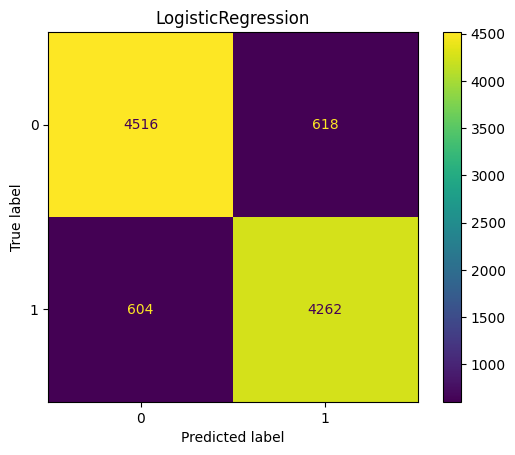

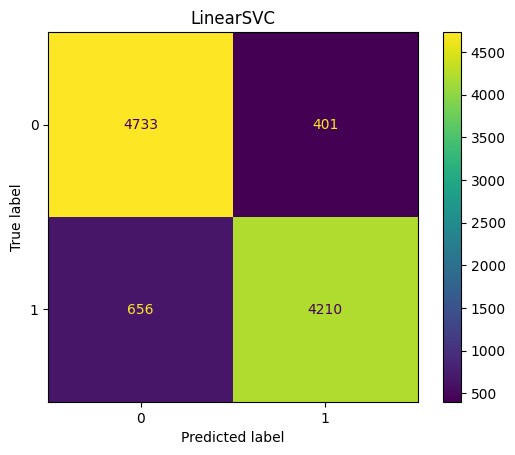

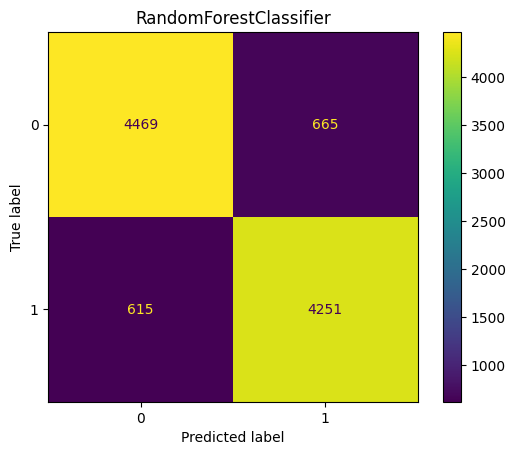

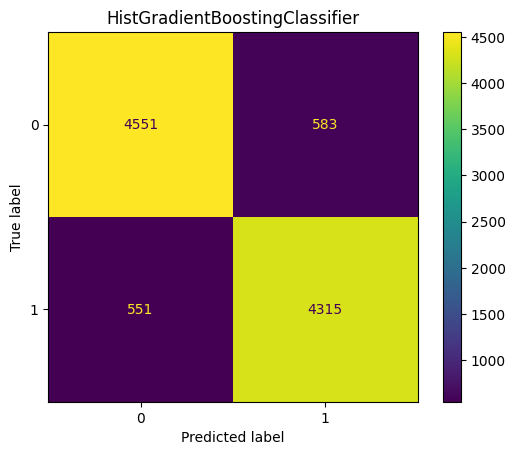

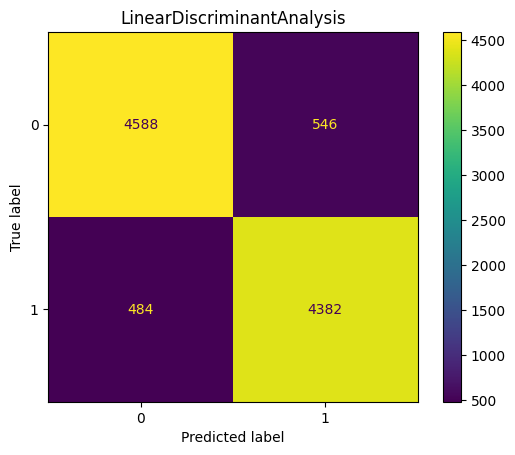

In [13]:
for clf, name in zip(clfs, clfs_names):
    y_pred = ys_pred[name]
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.grid(False)
    plt.show()

During processing LinearSVC. Exception: 'LinearSVC' object has no attribute 'predict_proba' occurred.


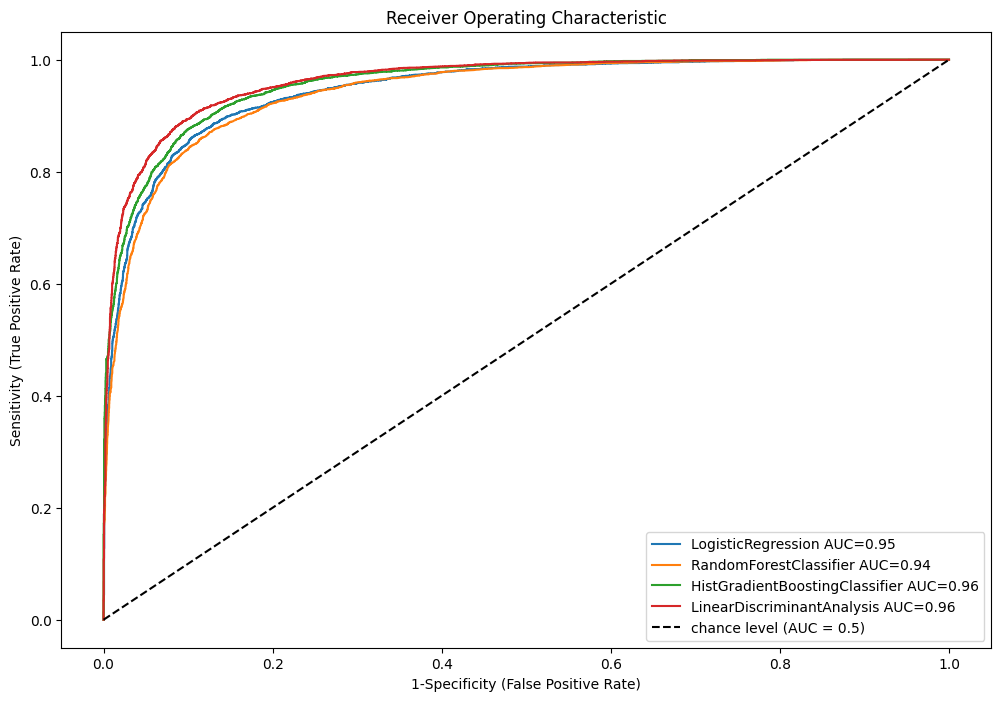

In [14]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
ys_pred_proba = {}
clfs_thresholds = {}
plt.figure(figsize=(12,8))
for clf, name in zip(clfs, clfs_names):
    try:
        y_pred_proba = clf.predict_proba(X_val)
        y_pred_proba = y_pred_proba[:, 1]
        ys_pred_proba[name] = y_pred_proba

        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        clfs_thresholds[name] = thresholds

        plt.plot(fpr,tpr,label=f"{name} AUC={roc_auc:.2f}"+str())
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

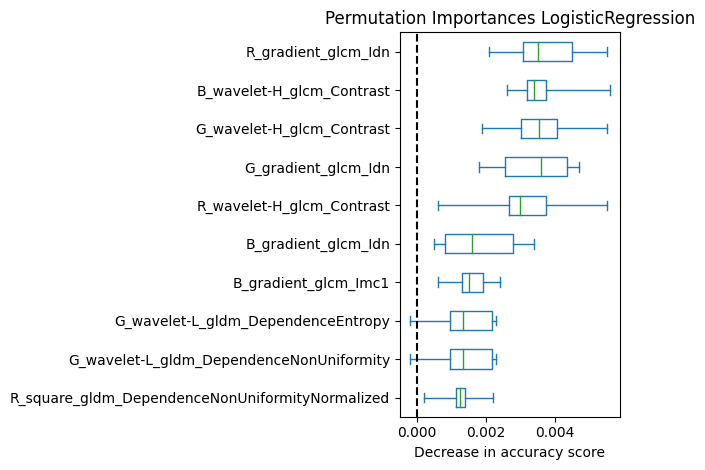

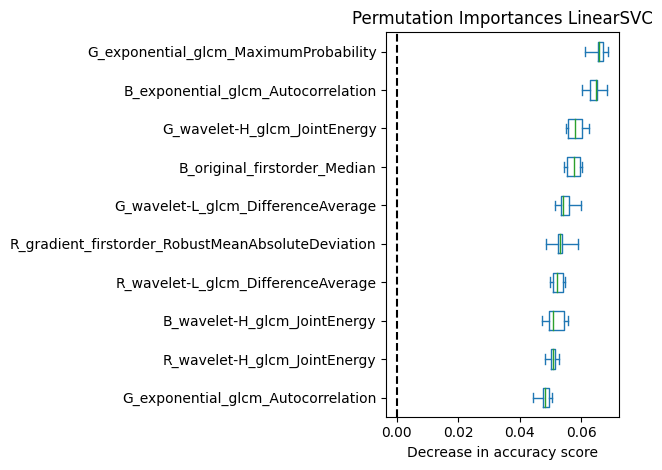

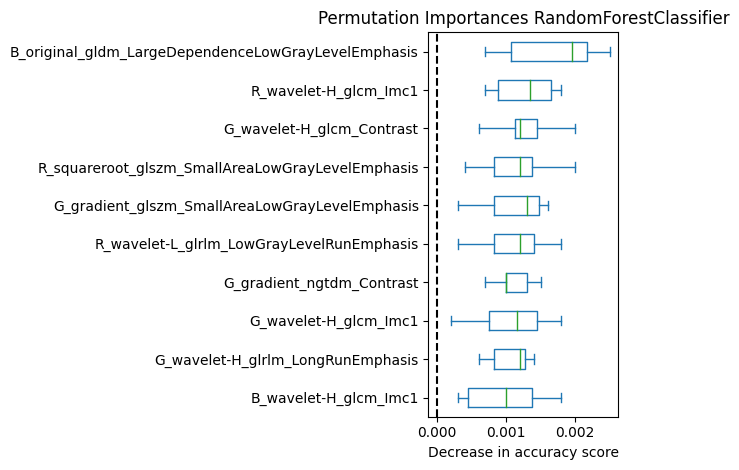

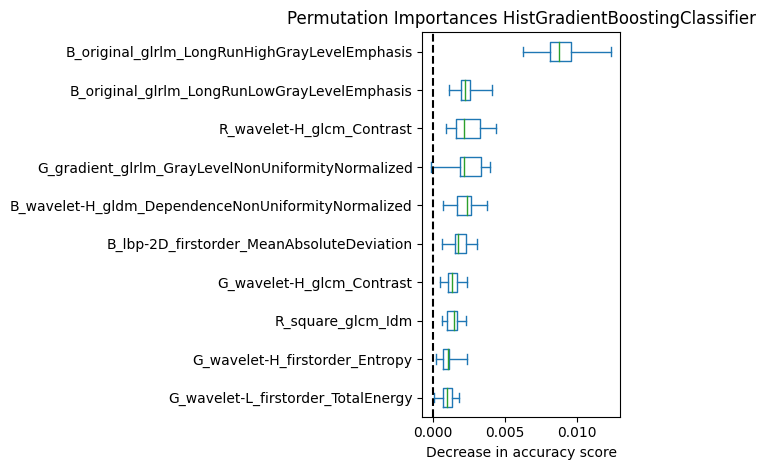

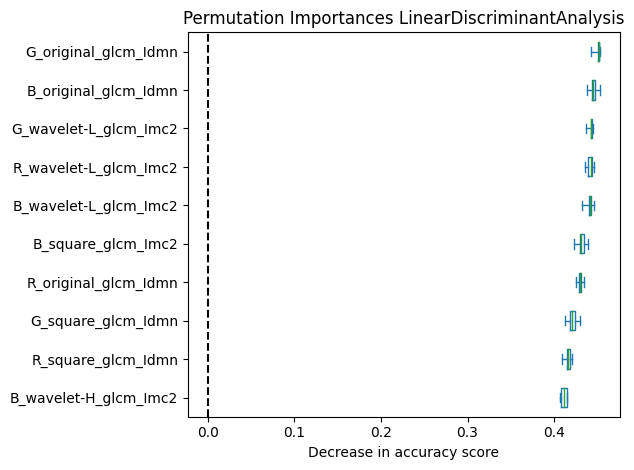

In [15]:
from sklearn.inspection import permutation_importance

clfs_importances = dict()
for clf, name in zip(clfs, clfs_names):
    try:
        result = permutation_importance(
            clf, X_val, y_val, n_repeats=10, random_state=random_state, n_jobs=4
        )

        clfs_importances[name] = result

        sorted_importances_idx = result.importances_mean.argsort()[-10:]
        importances = pd.DataFrame(
            result.importances[sorted_importances_idx].T,
            columns=X_train.columns[sorted_importances_idx],
        )
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances {name}")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.set_xlabel("Decrease in accuracy score")
        ax.figure.tight_layout()
        plt.show()
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

In [16]:
importances.keys()

Index(['B_wavelet-H_glcm_Imc2', 'R_square_glcm_Idmn', 'G_square_glcm_Idmn',
       'R_original_glcm_Idmn', 'B_square_glcm_Imc2', 'B_wavelet-L_glcm_Imc2',
       'R_wavelet-L_glcm_Imc2', 'G_wavelet-L_glcm_Imc2',
       'B_original_glcm_Idmn', 'G_original_glcm_Idmn'],
      dtype='object')

### Check performance on test data

In [17]:
test_dataset = pd.DataFrame(data=np.hstack((X_test, y_test)), columns=saved_columns)
test_dataset.head()

,R_original_firstorder_10Percentile,R_original_firstorder_90Percentile,R_original_firstorder_Energy,R_original_firstorder_Entropy,R_original_firstorder_InterquartileRange,R_original_firstorder_Kurtosis,R_original_firstorder_Maximum,R_original_firstorder_MeanAbsoluteDeviation,R_original_firstorder_Mean,R_original_firstorder_Median,...,B_lbp-2D_firstorder_Kurtosis,B_lbp-2D_firstorder_MeanAbsoluteDeviation,B_lbp-2D_firstorder_Mean,B_lbp-2D_firstorder_Median,B_lbp-2D_firstorder_RobustMeanAbsoluteDeviation,B_lbp-2D_firstorder_RootMeanSquared,B_lbp-2D_firstorder_Skewness,B_lbp-2D_firstorder_TotalEnergy,B_lbp-2D_firstorder_Variance,Category
0,0.447640,0.566370,0.500,0.970449,0.622180,0.019474,0.253946,0.752161,0.454545,0.451773,...,0.132559,0.540571,0.176582,0.0,0.562679,0.257812,0.595646,0.207482,0.482695,0.0
1,0.467900,0.555462,0.625,0.988684,0.628559,0.024088,0.313997,0.738412,0.500000,0.438526,...,0.072750,0.672279,0.208228,0.2,0.662492,0.322717,0.558559,0.265226,0.615329,0.0
2,0.377896,0.468117,0.250,0.940739,0.675671,0.017489,0.148623,0.787421,0.454545,0.667736,...,0.129923,0.543068,0.145253,0.0,0.450777,0.228625,0.578353,0.182238,0.473107,0.0
3,0.421173,0.442960,0.500,0.975582,0.513540,0.035574,0.325026,0.661611,0.454545,0.560405,...,0.181479,0.449216,0.139557,0.0,0.351210,0.193531,0.636756,0.152478,0.373743,0.0
4,0.618256,0.668719,0.250,0.848714,0.425543,0.040086,0.256537,0.668074,0.454545,0.284417,...,0.103363,0.598316,0.204430,0.0,0.604064,0.296113,0.569231,0.241289,0.533683,0.0


In [18]:
y_pred = clf.predict(X_test)

results = {'Name': [], 'Accuracy': [], 'F1 score': [], 'Precision': [], 'Recall': []}
ys_pred = {}

for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_test)
    ys_pred[name] = y_pred
    results['Name'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))

results_df = pd.DataFrame(results)
print("Results WITHOUT threshold adjustment on TEST data")
results_df.head(len(clfs_names))

Results WITHOUT threshold adjustment on TEST data


,Name,Accuracy,F1 score,Precision,Recall
0,LogisticRegression,0.87530,0.875125,0.876354,0.8739
1,LinearSVC,0.89645,0.893275,0.921531,0.8667
2,RandomForestClassifier,0.87540,0.875425,0.875250,0.8756
3,HistGradientBoostingClassifier,0.88725,0.887391,0.886284,0.8885
4,LinearDiscriminantAnalysis,0.90140,0.901518,0.900439,0.9026


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, RocCurveDisplay

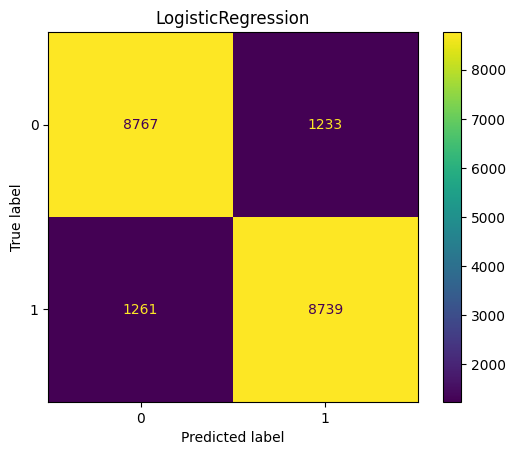

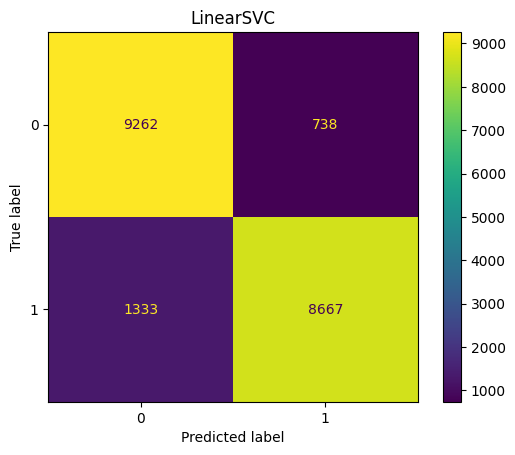

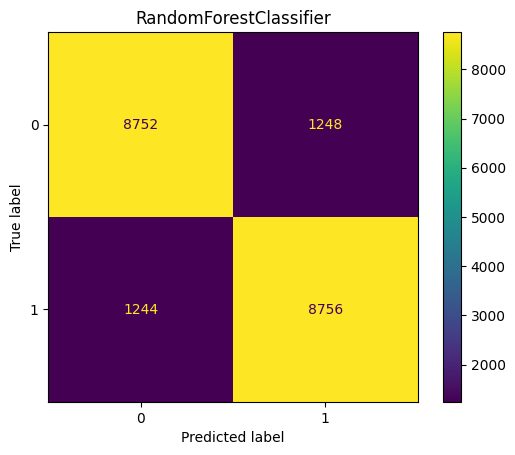

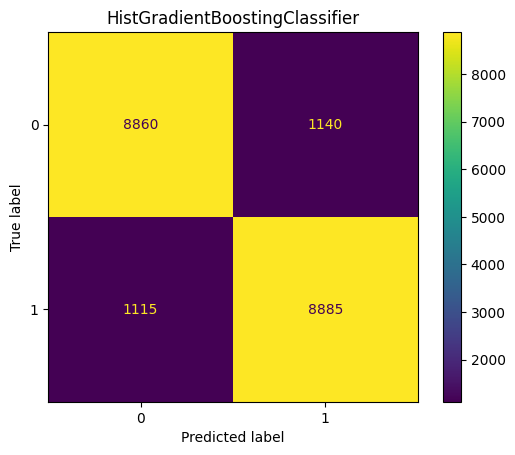

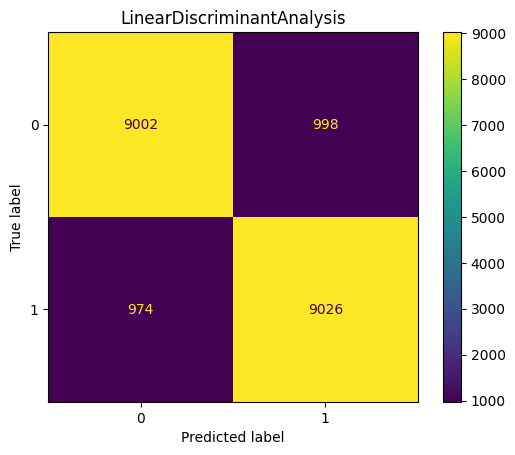

In [20]:
for clf, name in zip(clfs, clfs_names):
    y_pred = clf.predict(X_test)
    ys_pred[name] = y_pred
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f"{name}")
    plt.grid(False)
    plt.show()

During processing LinearSVC. Exception: 'LinearSVC' object has no attribute 'predict_proba' occurred.


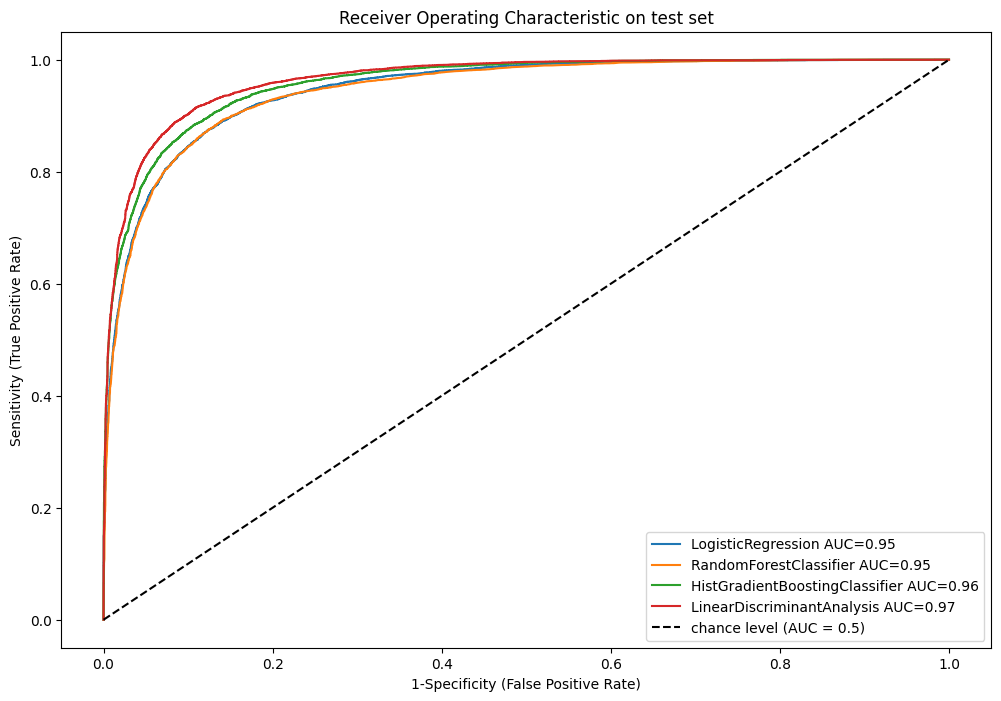

In [21]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
ys_pred_proba = {}
clfs_thresholds = {}
plt.figure(figsize=(12,8))
for clf, name in zip(clfs, clfs_names):
    try:
        y_pred_proba = clf.predict_proba(X_test)
        y_pred_proba = y_pred_proba[:, 1]
        ys_pred_proba[name] = y_pred_proba

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        clfs_thresholds[name] = thresholds

        plt.plot(fpr,tpr,label=f"{name} AUC={roc_auc:.2f}"+str())
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic on test set')
plt.legend()
plt.show()

# Save importances

In [22]:
import pickle

with open('rgb_clfs_importances.pkl', 'wb') as f:
    pickle.dump([clfs_importances], f)

# Save models

In [23]:
import pickle

with open('rgb_clfs.pkl', 'wb') as f:
    pickle.dump([clfs], f)

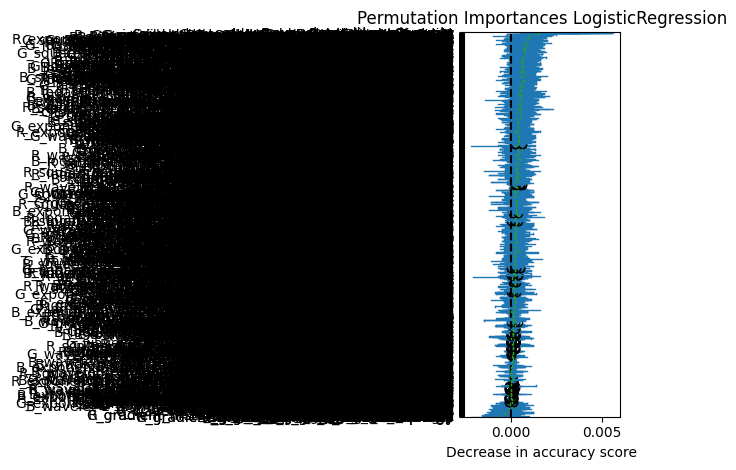

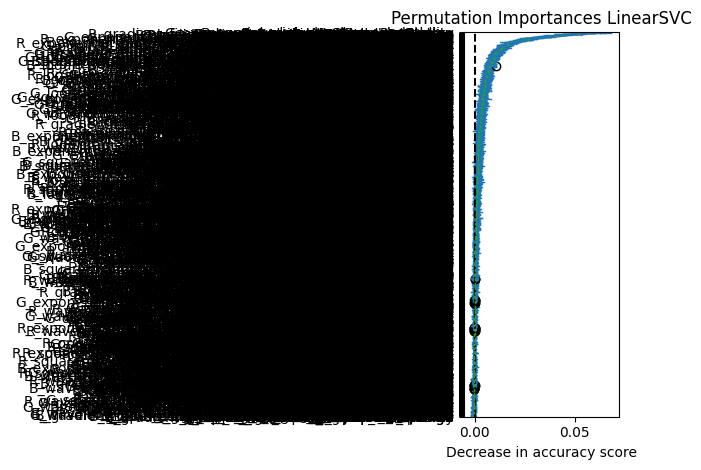

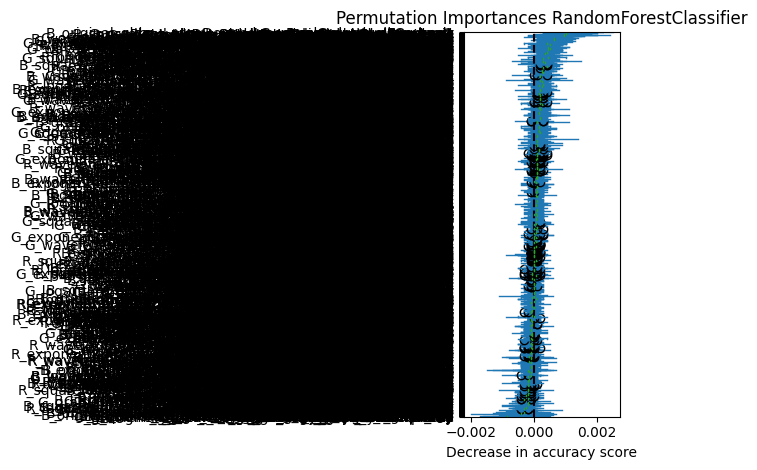

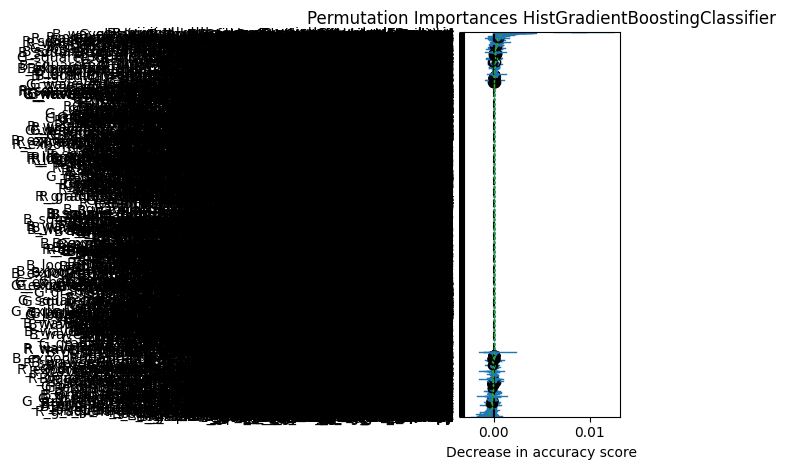

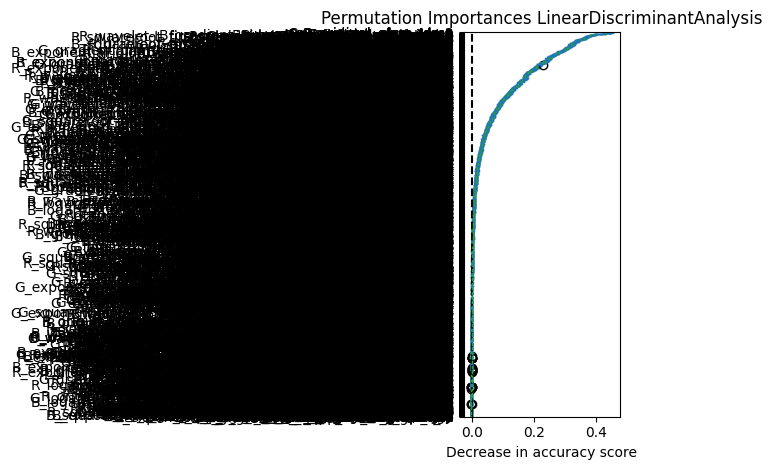

In [24]:
for clf, name in zip(clfs, clfs_names):
    try:
        result = clfs_importances[name]

        sorted_importances_idx = result.importances_mean.argsort()
        importances = pd.DataFrame(
            result.importances[sorted_importances_idx].T,
            columns=X_train.columns[sorted_importances_idx],
        )
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances {name}")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.set_xlabel("Decrease in accuracy score")
        ax.figure.tight_layout()
        plt.show()
    except Exception as e:
        print(f"During processing {name}. Exception: {e} occurred.")